# DATA.ML.100 Introduction to Pattern Recognition and Machine Learning

## Exercise 3 Visual classication (CIFAR-10 dataset)

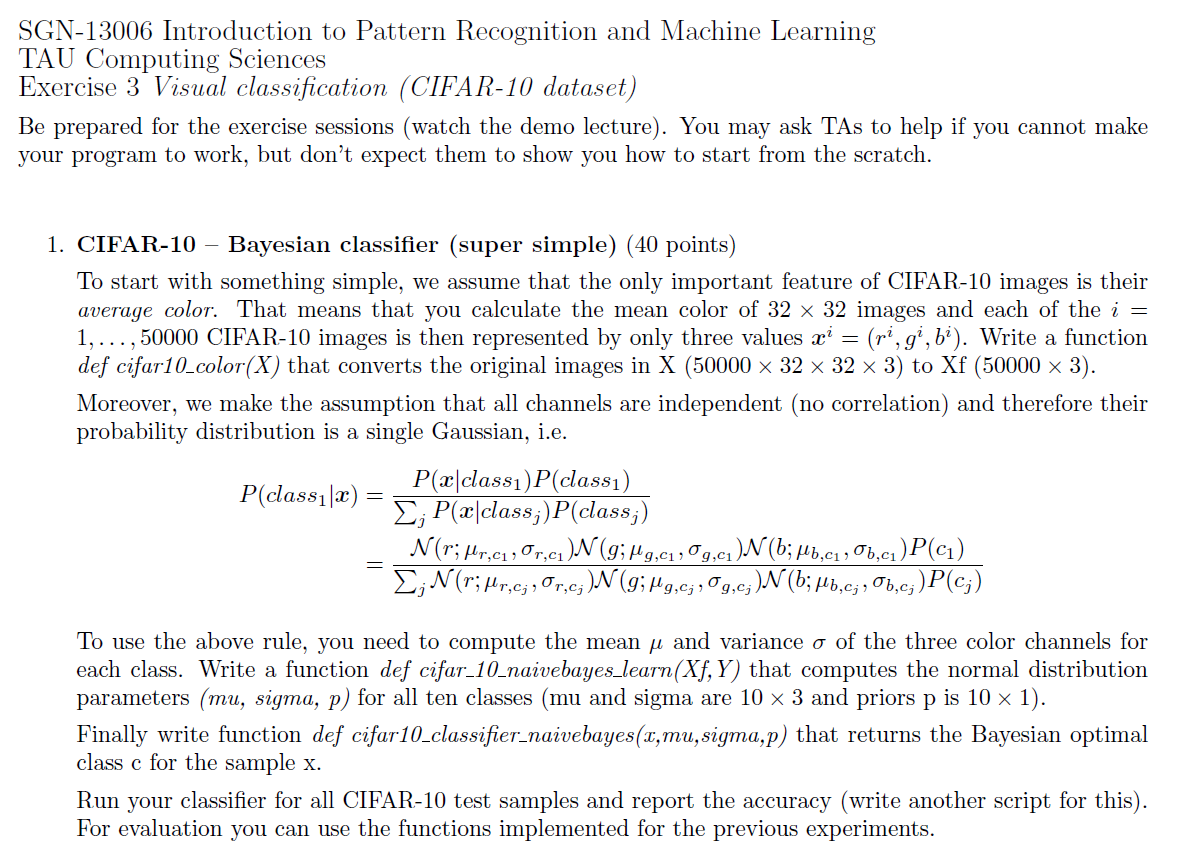

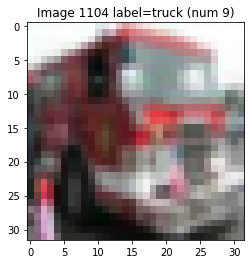

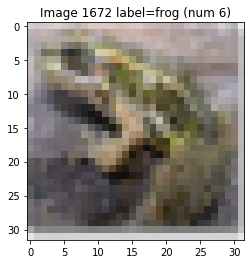

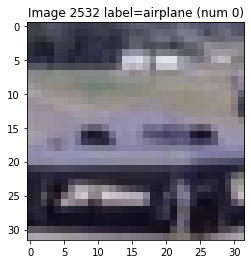

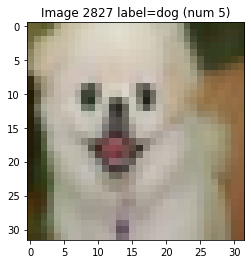

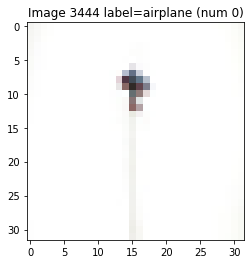

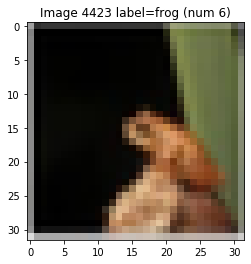

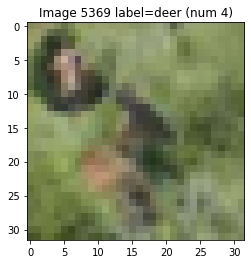

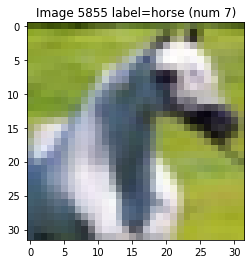

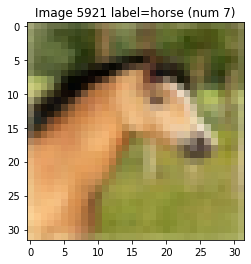

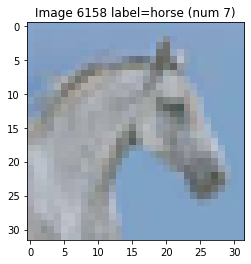

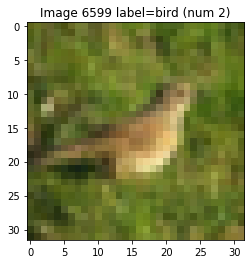

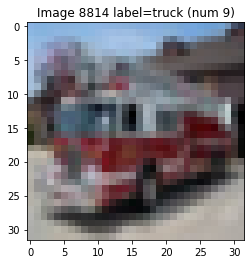

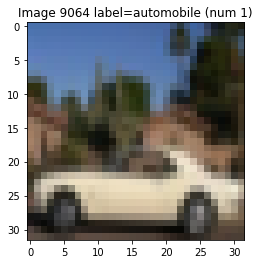

In [2]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from random import random

def unpickle(file):
    with open(file, 'rb') as f:
        pk_dict = pickle.load(f, encoding="latin1")
    return pk_dict

datadict = unpickle('test_batch')
X = datadict["data"]
Y = datadict["labels"]

labeldict = unpickle('batches.meta')
label_names = labeldict["label_names"]

X = X.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("uint8")
Y = np.array(Y)

for i in range(X.shape[0]):
    # Show some images randomly
    if random() > 0.999:
        plt.figure(1);
        plt.clf()
        plt.imshow(X[i])
        plt.title(f"Image {i} label={label_names[Y[i]]} (num {Y[i]})")
        plt.pause(1)


In [3]:
def class_acc(pred, gt):
    accuracy_count = 0
    for i in range(pred.size):
        if pred[i] == gt[i]:
            accuracy_count += 1
    accu_percent= (accuracy_count/gt.size)*100 
    return  accu_percent

accuracy_prediction= class_acc(Y, Y)
print('Class accuracy: {:.2f}%'.format(accuracy_prediction))

Class accuracy: 100.00%


In [4]:
def cifar10_color(X):
    reshapeofX = X.reshape(X.shape[0], 3, 32, 32) 
    meansofX = reshapeofX.mean(axis=(2, 3))
    return meansofX

In [5]:
traininglabelsY = np.hstack(np.array(([unpickle('data_batch_' + str(i))['labels'] for i in range(1, 6)])))
training_dataX = np.concatenate([unpickle('data_batch_' + str(i))['data'] for i in range(1, 6)], axis=0)
X_trainmean = cifar10_color(training_dataX)

In [6]:
def cifar_10_naivebayes_learn(Xf, Y):
    Xfjoin = np.concatenate((Xf, Y.reshape(50000, 1)), axis=1) 
    Xfsorted = Xfjoin[Xfjoin[:, -1].argsort()] 
    Xfsplit = np.array_split(Xfsorted[:, :3], 10) 
    n_mean = np.zeros((10, 3))
    std = np.zeros_like(n_mean)
    paramn = np.zeros((10, 1))
    for r in range(n_mean.shape[0]):
        n_mean[r] = np.mean(Xfsplit[r], axis=0)
        std[r] = np.std(Xfsplit[r], axis=0)
        paramn[r] = 0.1
    return n_mean, std, paramn

In [7]:
means, standdev, pr = cifar_10_naivebayes_learn(X_trainmean, traininglabelsY) 

In [8]:
import scipy.stats as stats
def cifar10_classifier_naivebayes(x, mu, sigma, p):
    inipost = np.zeros((10, 1)) 
    n_dst = stats.norm.pdf(x, mu, sigma) 
    for i in range(10):
        inipost[i] = n_dst[i, 0] * n_dst[i, 1] * n_dst[i, 2] * p[i, 0] 
    opt_class = np.argmax(inipost) 
    return opt_class

In [9]:
tstdict = unpickle('test_batch') 
tstdataX = (tstdict['data'])  
tstlablY = np.array(tstdict["labels"])

In [10]:
testX_means = cifar10_color(tstdataX)

In [11]:
predictionlabls = np.zeros_like(tstlablY)
for i, row_data in enumerate(testX_means):
    predictionlabls[i] = cifar10_classifier_naivebayes(row_data, means, standdev, pr)


In [12]:
def class_acc(pred, gt):
    ac = 0
    for i in range(pred.size):     
        if pred[i] == gt[i]:
            ac += 1
    accuracypercentage = (ac/gt.size)*100 
    return accuracypercentage

In [13]:
predictionAccuracy = class_acc(predictionlabls, tstlablY)
print('Accuracy of naive bayes classifier is: {:0.1f}%'.format(predictionAccuracy))

Accuracy of naive bayes classifier is: 19.5%


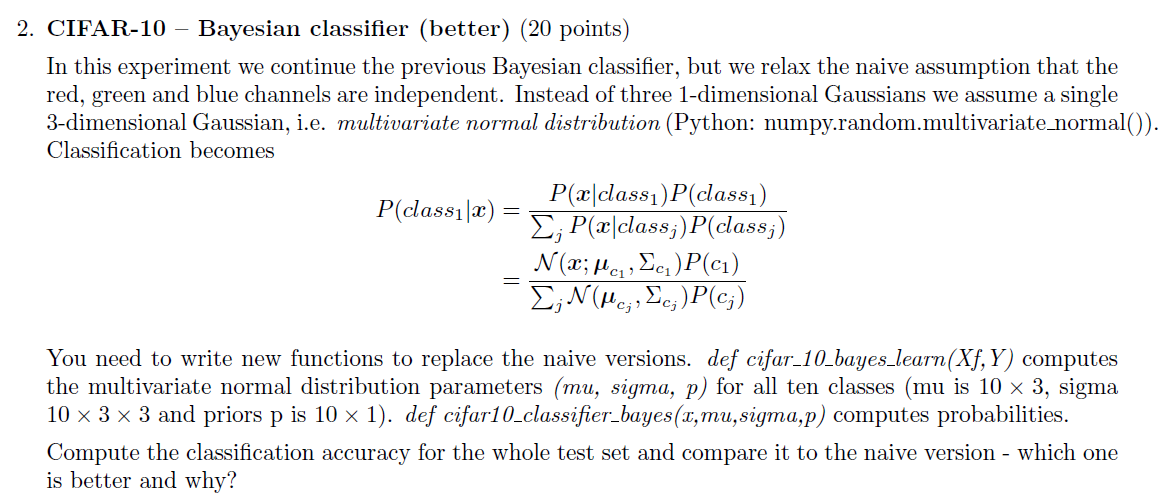

#### Naive classifier doesnt have that much correleation with color channels , on the other hand multivariate classfier have better correlations. The bayes classifier performs better than Naive according to their accuracy. 

In [14]:
def cifar_10_bayes_learn(Xf, Y):
    Xfjoin = np.concatenate((Xf, Y.reshape(50000, 1)), axis=1) 
    Xfsorted = Xfjoin[Xfjoin[:, -1].argsort()]
    Xfsplit = np.array_split(Xfsorted[:, :3], 10) 
    normalmean = np.zeros((10, 3))
    normcovarience = np.zeros((10, 3, 3))
    normalpr = np.zeros((10, 1))
    for r in range(normalmean.shape[0]):
        normalmean[r] = np.mean(Xfsplit[r], axis=0)
        normcovarience[r] = np.cov(Xfsplit[r], rowvar= False)
        normalpr[r] = 0.1 
    return normalmean, normcovarience, normalpr

In [15]:
normalmeann, normcovariencen, normalprn = cifar_10_bayes_learn(X_trainmean, traininglabelsY) 

In [16]:
def cifar10_classifier_bayes(x, mu, sigma, p):
    mulclapost = np.zeros((10, 1))
    for i in range(10):
        mulclapost[i] = (stats.multivariate_normal.logpdf(x, mu[i, :], sigma[i, :, :])) * p[i, 0]
    opt_class = np.argmax(mulclapost)
    return opt_class

In [17]:
multivarpredlabs = np.zeros_like(tstlablY)
for i, row_data in enumerate(testX_means):
    multivarpredlabs[i] = cifar10_classifier_bayes(row_data, normalmeann, normcovariencen, normalprn)


In [18]:
multivarpredictionaccuracy = class_acc(multivarpredlabs, tstlablY)
print('Accuracy of the multivariate bayes classifier is: {:0.1f} %'.format(multivarpredictionaccuracy))

Accuracy of the multivariate bayes classifier is: 24.6 %


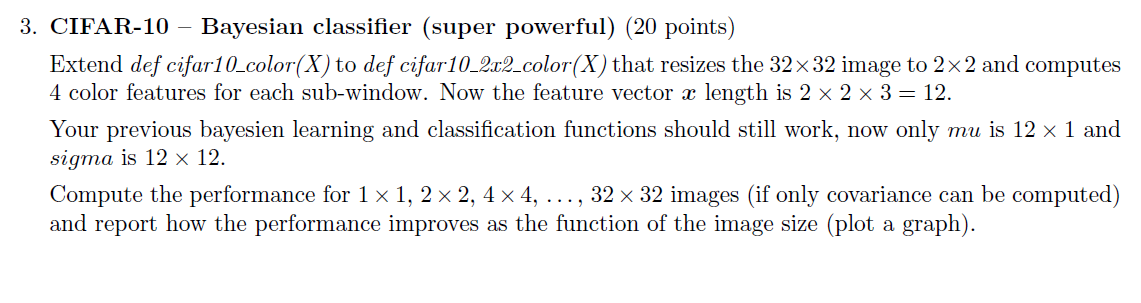

In [36]:
reshapeXtraining = training_dataX.reshape(training_dataX.shape[0], 3, 32, 32).transpose(0,2,3,1).astype("uint8")

In [37]:
def cifar10_2x2_color(X, img_size):
    meansofX = np.zeros((X.shape[0], (img_size**2)*3))
    for i in range(X.shape[0]):
        img = X[i]
        resized_img = resize(img, (img_size, img_size))
        rvalues = resized_img[:,:,0].reshape(img_size*img_size)
        gvalues = resized_img[:,:,1].reshape(img_size*img_size)
        bvalues = resized_img[:,:,2].reshape(img_size*img_size)
        meanofX[i, :] = np.concatenate((rvalues, gvalues, bvalues), axis=0)
    return meanofX

In [ ]:
Xmean11 = cifar10_2x2_color(reshapeXtraining, 1)
Xmean22 = cifar10_2x2_color(reshapeXtraining, 2)
Xmean44 = cifar10_2x2_color(reshapeXtraining, 4)
Xmean88 = cifar10_2x2_color(reshapeXtraining, 8)
Xmean1616 = cifar10_2x2_color(reshapeXtraining, 16)
Xmean3232 = cifar10_2x2_color(reshapeXtraining, 32)

In [39]:
def cifar_10_bayes_learn_nxn(Xf, Y):
    Xfjoin = np.concatenate((Xf, Y.reshape(50000, 1)), axis=1) 
    Xfsorted = Xfjoin[Xfjoin[:, -1].argsort()] 
    Xfsplit = np.array_split(Xfsorted[:, :Xf.shape[1]], 10) 
    meanini = np.zeros((10, Xf.shape[1]))
    covarini = np.zeros((10, Xf.shape[1], Xf.shape[1]))
    prini = np.zeros((10, 1))
    for r in range(meanini.shape[0]):
        meanini[r] = np.mean(Xfsplit[r], axis=0)
        covarini[r] = np.cov(Xfsplit[r], rowvar= False)
        prini[r] = 0.1 
    return meanini, covarini, prini

In [ ]:
mu11, sigma11, p11 = cifar_10_bayes_learn_nxn(Xmean11, traininglabelsY)
mu22, sigma22, p22 = cifar_10_bayes_learn_nxn(Xmean22, traininglabelsY)
mu44, sigma44, p44 = cifar_10_bayes_learn_nxn(Xmean44, traininglabelsY)
mu88, sigma88, p88 = cifar_10_bayes_learn_nxn(Xmean88, traininglabelsY)
mu1616, sigma1616, p1616 = cifar_10_bayes_learn_nxn(Xmean1616, traininglabelsY)
mu3232, sigma3232, p3232 = cifar_10_bayes_learn_nxn(Xmean3232, traininglabelsY)

In [ ]:
testimgX = tstdataX.reshape(tstdataX.shape[0], 3, 32, 32).transpose(0,2,3,1).astype("uint8")

In [ ]:
testmean11X = cifar10_2x2_color(testimgX, 1)
predictionlabel1 = np.zeros_like(tstlablY)
for i, row_data in enumerate(testmean11X):
    predictionlabel1[i] = cifar10_classifier_bayes(row_data, mu11, sigma11, p11)

prediction_Accuracy11 = class_acc(predictionlabel1, tstlablY)
print('Accuracy of the classifier : image size 1x1: {:0.1f} %'.format(prediction_Accuracy11)

Accuracy of the classifier : image size 1x1:  24.8 %

In [ ]:
testmean22X = cifar10_2x2_color(testimgX, 1)
predictionlabel22 = np.zeros_like(tstlablY)
for i, row_data in enumerate(testmean22X):
    predictionlabel22[i] = cifar10_classifier_bayes(row_data, mu22, sigma22, p22)

prediction_Accuracy22 = class_acc(predictionlabel22, tstlablY)
print('Accuracy of the classifier : image size 2x2: {:0.1f} %'.format(prediction_Accuracy22)

Accuracy of the classifier : image size 2x2:  31.1 %

In [ ]:
testmeanX44 = cifar10_2x2_color(testimgX, 4)
predictlabel44 = np.zeros_like(tstlablY)
for i, row_data in enumerate(testmeanX44):
    predictlabel44[i] = cifar10_classifier_bayes(row_data, mu44, sigma44, p44)

prediction_Accuracy44 = class_acc(predictlabel44, tstlablY)

print('Accuracy of the classifier : image size 4x4: {:0.1f} %'.format(prediction_Accuracy44)


Accuracy of the classifier : image size 4x4:  40.2 %

In [ ]:
testmeanX88 = cifar10_2x2_color(testimgX, 8)
predictlabel88 = np.zeros_like(tstlablY)
for i, row_data in enumerate(testmeanX88):
    predictlabel88[i] = cifar10_classifier_bayes(row_data, mu88, sigma88, p88)
    
prediction_Accuracy88 = class_acc(predictionlabls_8x8, tstlablY)
print('Accuracy of the classifier : image size 8x8: {:0.1f} %'.format(prediction_Accuracy88)


Accuracy of the classifier : image size 8x8: 40.7 %

In [ ]:
testmeanX1616 = cifar10_2x2_color(testimgX, 16)
predictionlabels1616 = np.zeros_like(tstlablY)
for i, row_data in enumerate(testmeanX1616):
    predictionlabels1616[i] = cifar10_classifier_bayes(row_data, mu1616, sigma1616, p1616)
    
prediction_Accuracy1616 = class_acc(predictionlabls_16x16, tstlablY)
print('Accuracy of the classifier : image size 16x16: {:0.1f} %'.format(prediction_Accuracy1616)

Accuracy of the classifier : image size 16x16: 43.5 %

In [1]:
testmeanX3232 = cifar10_2x2_color(testimgX, 32)
predictionlabels3232 = np.zeros_like(Y_test_labels)
for i, row_data in enumerate(X_test_mean_32x32):
    predictionlabels3232[i] = cifar10_classifier_bayes(row_data, mu3232, sigma3232, predictionlabels3232)

prediction_Accuracy3232 = class_acc(predictionlabls_32x32, tstlablY)
print('Accuracy of the classifier : image size 32x32: {:0.0f} %'.format(prediction_Accuracy3232)

SyntaxError: unexpected EOF while parsing (<ipython-input-1-a9c03d3498a9>, line 7)

In [ ]:
xarr = np.array([1, 2, 4, 8, 16])
yarr = np.array([25.60, 31.50, 40.56, 43.32, 45.42])
plt.figure(figsize=(20,10))
plt.plot(x_1, y_1, c='r', marker='')
plt.xlabel('Size')
plt.ylabel('Accuracy (%)')
plt.title('Classification accuracy of the images')
plt.grid()
plt.savefig('accuracy.png')
plt.show()

In [1]:
subplots(1, 2, figsize=)

NameError: name 'subplots' is not defined